In [94]:
import os
import pandas as pd
import scipy.io
path = "/Users/jorgerag/Documents/UCSD/courses/capstone/data/photometry_analog/PV Population/"
os.chdir(path)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [95]:
mat = scipy.io.loadmat('GCAMP_4268_1600-7.mat')
mat = mat['GCAMP']

In [103]:
pd.DataFrame(mat['gcampdata'][0][0]).describe()

,0
count,108591.0000
mean,0.2133
std,0.2231
min,-0.4612
25%,0.0837
50%,0.1879
75%,0.2981
max,2.9409


In [101]:
pd.DataFrame(mat['gcampdata_delta_F'][0][0]).describe()

,0
count,108591.0000
mean,106.4473
std,111.3110
min,-230.4707
25%,41.7593
50%,93.7368
75%,148.7322
max,1466.5101


In [105]:
pd.DataFrame(mat['gcampdata_delta_FoverF'][0][0]).describe()

,0
count,108591.0000
mean,0.0021
std,0.0022
min,-0.0046
25%,0.0008
50%,0.0019
75%,0.0030
max,0.0294


In [107]:
pd.DataFrame(mat['raw_gcampdata'][0][0]).describe()

,0
count,217182.0000
mean,24020.0377
std,8357.9668
min,15067.0000
25%,15656.0000
50%,24566.5000
75%,32309.0000
max,34303.0000


In [124]:
# get filename info
def get_filename_info(df, filename):
    filename_info = filename.split("_")
    filename_info_sub = filename_info[2].split("-")
    df['subject'] = filename_info[1].strip()
    df['threshold'] = int(filename_info_sub[0].strip())
    df['day'] = filename_info_sub[1].replace(".mat", "").strip()

    return df

In [125]:
# get behavioral information
def get_beh(mat, filename):
    beh_data = mat['GCAMP']['beh_data'][0][0]
    beh_data = pd.DataFrame(beh_data)

    new_header = beh_data.iloc[0] #grab the first row for the header
    beh_data = beh_data[1:] #take the data less the header row
    beh_data.columns = new_header

    beh_data = get_filename_info(beh_data, filename)

    return beh_data


In [160]:
# get photometry information
def get_photo(mat, filename):
    photo_data = pd.DataFrame()
    photo_data['timestamp'] = pd.DataFrame(mat['GCAMP']['raw_gcamptimestamps'][0][0])
    photo_data['gcamp'] = pd.DataFrame(mat['GCAMP']['raw_gcampdata'][0][0])

    photo_data = get_filename_info(photo_data, filename)

    return photo_data

In [161]:
behavioral_data = pd.DataFrame()
photometry_data = pd.DataFrame()
for file in os.listdir(os.curdir):
    mat = scipy.io.loadmat(os.path.join(os.curdir, file))
    print(file)
    # behavioral dataframe
    beh_data = get_beh(mat, file)
    behavioral_data = pd.concat([behavioral_data, beh_data])
    # photometry dataframe
    photo_data = get_photo(mat, file)
    photometry_data = pd.concat([photometry_data, photo_data])

behavioral_data.columns = ["timestamp", "lp", "he", "rew", "subject", "threshold", "day"]

GCAMP_4268_1600-7.mat
GCAMP_3316_1600-5.mat
GCAMP_3316_1600-4.mat
GCAMP_4268_1600-6.mat
GCAMP_4268_1600-4.mat
GCAMP_3316_1600-6.mat
GCAMP_4268_1600-5.mat
GCAMP_4268_1600-1.mat
GCAMP_3316_1600-3.mat
GCAMP_3316_1600-2.mat
GCAMP_4268_1600-2.mat
GCAMP_4268_1600-3.mat
GCAMP_4269_1600-8.mat
GCAMP_3317_1600-3.mat
GCAMP_3203_1600-3.mat
GCAMP_4269_1600-1.mat
GCAMP_3203_1600-2.mat
GCAMP_4269_1600-3.mat
GCAMP_3317_1600-1.mat
GCAMP_3317_1600-5.mat
GCAMP_4269_1600-7.mat
GCAMP_4269_1600-6.mat
GCAMP_4269_1600-5.mat
GCAMP_3201_1600-2.mat
GCAMP_3315_1600-3.mat
GCAMP_3204_1600-6.mat
GCAMP_3204_1600-4.mat
GCAMP_3204_1600-5.mat
GCAMP_4268_1600-8.mat
GCAMP_3201_1600-4.mat
GCAMP_3201_1600-5.mat
GCAMP_3315_1600-6.mat
GCAMP_3201_1600-6.mat


In [178]:
photometry_data.sort_values(by = ["gcamp"]).tail(115000)

,timestamp,gcamp,subject,threshold,day
125426,54178039.9488,111373,3317,1600,3
122132,54095544.5120,111373,3317,1600,3
104650,53657722.7392,111373,3317,1600,3
123364,54126398.8480,111373,3317,1600,3
122680,54109268.6976,111374,3317,1600,3
...,...,...,...,...,...
59,52211717.1712,536378,3204,1600,4
89,52212468.4416,536398,3204,1600,4
57,52211667.4944,536899,3204,1600,4
53,52211567.3472,536910,3204,1600,4


In [197]:
photometry_data[((photometry_data['subject'] != '3204') | (photometry_data['day'] != '4')) & ((photometry_data['subject'] != '3316') | (photometry_data['day'] != '5'))].sort_values(by = ["gcamp"]).tail(100)

,timestamp,gcamp,subject,threshold,day
349,53993682.1504,209904,3317,1600,5
1501,54022534.8992,209905,3317,1600,5
817,54005402.6624,209906,3317,1600,5
331,53993230.9632,209907,3317,1600,5
439,53995935.4496,209910,3317,1600,5
...,...,...,...,...,...
1881,54032049.4464,210163,3317,1600,5
385,53994583.7312,210163,3317,1600,5
873,54006804.5184,210165,3317,1600,5
1429,54020729.3696,210181,3317,1600,5


In [173]:
photometry_data.describe()

,timestamp,gcamp,threshold
count,7382370.0000,7382370.0000,7382370.0000
mean,50910624.4901,37949.5560,1600.0000
std,6664312.3600,44025.1304,0.0000
min,32523149.9648,14653.0000,1600.0000
25%,47682555.9296,15808.0000,1600.0000
50%,51937530.6752,31980.0000,1600.0000
75%,55640192.9312,43337.0000,1600.0000
max,63125123.5584,536921.0000,1600.0000


<AxesSubplot:ylabel='Density'>

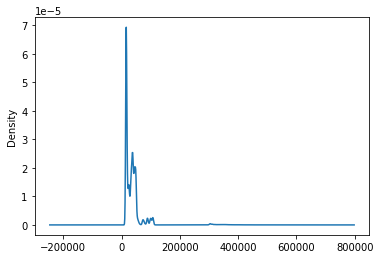

In [203]:
photometry_data['gcamp'].plot(kind='kde')

In [204]:
photometry_data.groupby(['subject', 'day']).mean('gcamp')

timestamp       gcamp  threshold
subject day                                     
3201    2   60174389.9286  24500.1569  1600.0000
        4   55014090.4644  28599.1802  1600.0000
        5   56386195.9074  29994.8121  1600.0000
        6   48679763.1717  26121.2109  1600.0000
3203    2   60174389.1766  33034.8007  1600.0000
        3   59697169.2350  35952.9988  1600.0000
3204    4   55014086.8616 212683.9098  1600.0000
        5   56386196.2381  40081.1879  1600.0000
        6   48679778.7617  31256.3043  1600.0000
3315    3   53949540.3091  27092.3733  1600.0000
        6   53453380.5157  31995.9528  1600.0000
3316    2   45009801.7668  28243.6205  1600.0000
        3   53949540.3422  25733.5434  1600.0000
        4   53852047.5100  29360.0681  1600.0000
        5   56796680.6071  27382.1389  1600.0000
        6   53453380.5490  27604.8384  1600.0000
3317    1   48159830.3673  58783.0477  1600.0000
        3   53949537.0743  66327.4918  1600.0000
        5   56796673.3331  64006.9927  1600.0000
4268    1   49783308.7535  30090.6922  1600.0000
        2   49865820.8285  32187.2619  1600.0000
        3   49682005.6430  25780.3718  1600.0000
        4   55282476.1848  23852.0555  1600.0000
        5   44675323.7242  32178.1671  1600.0000
        6   38339770.5730  32202.8266  1600.0000
        7   50876898.7210  24020.0377  1600.0000
        8   34847307.5695  25093.0809  1600.0000
4269    1   49783308.7877  29551.2357  1600.0000
        3   49682005.6792  30974.7863  1600.0000
        5   44675323.7587  24321.7685  1600.0000
        6   38339770.6108  26803.6577  1600.0000
        7   50876898.7569  30892.4040  1600.0000
        8   34847307.6075  32249.6118  1600.0000

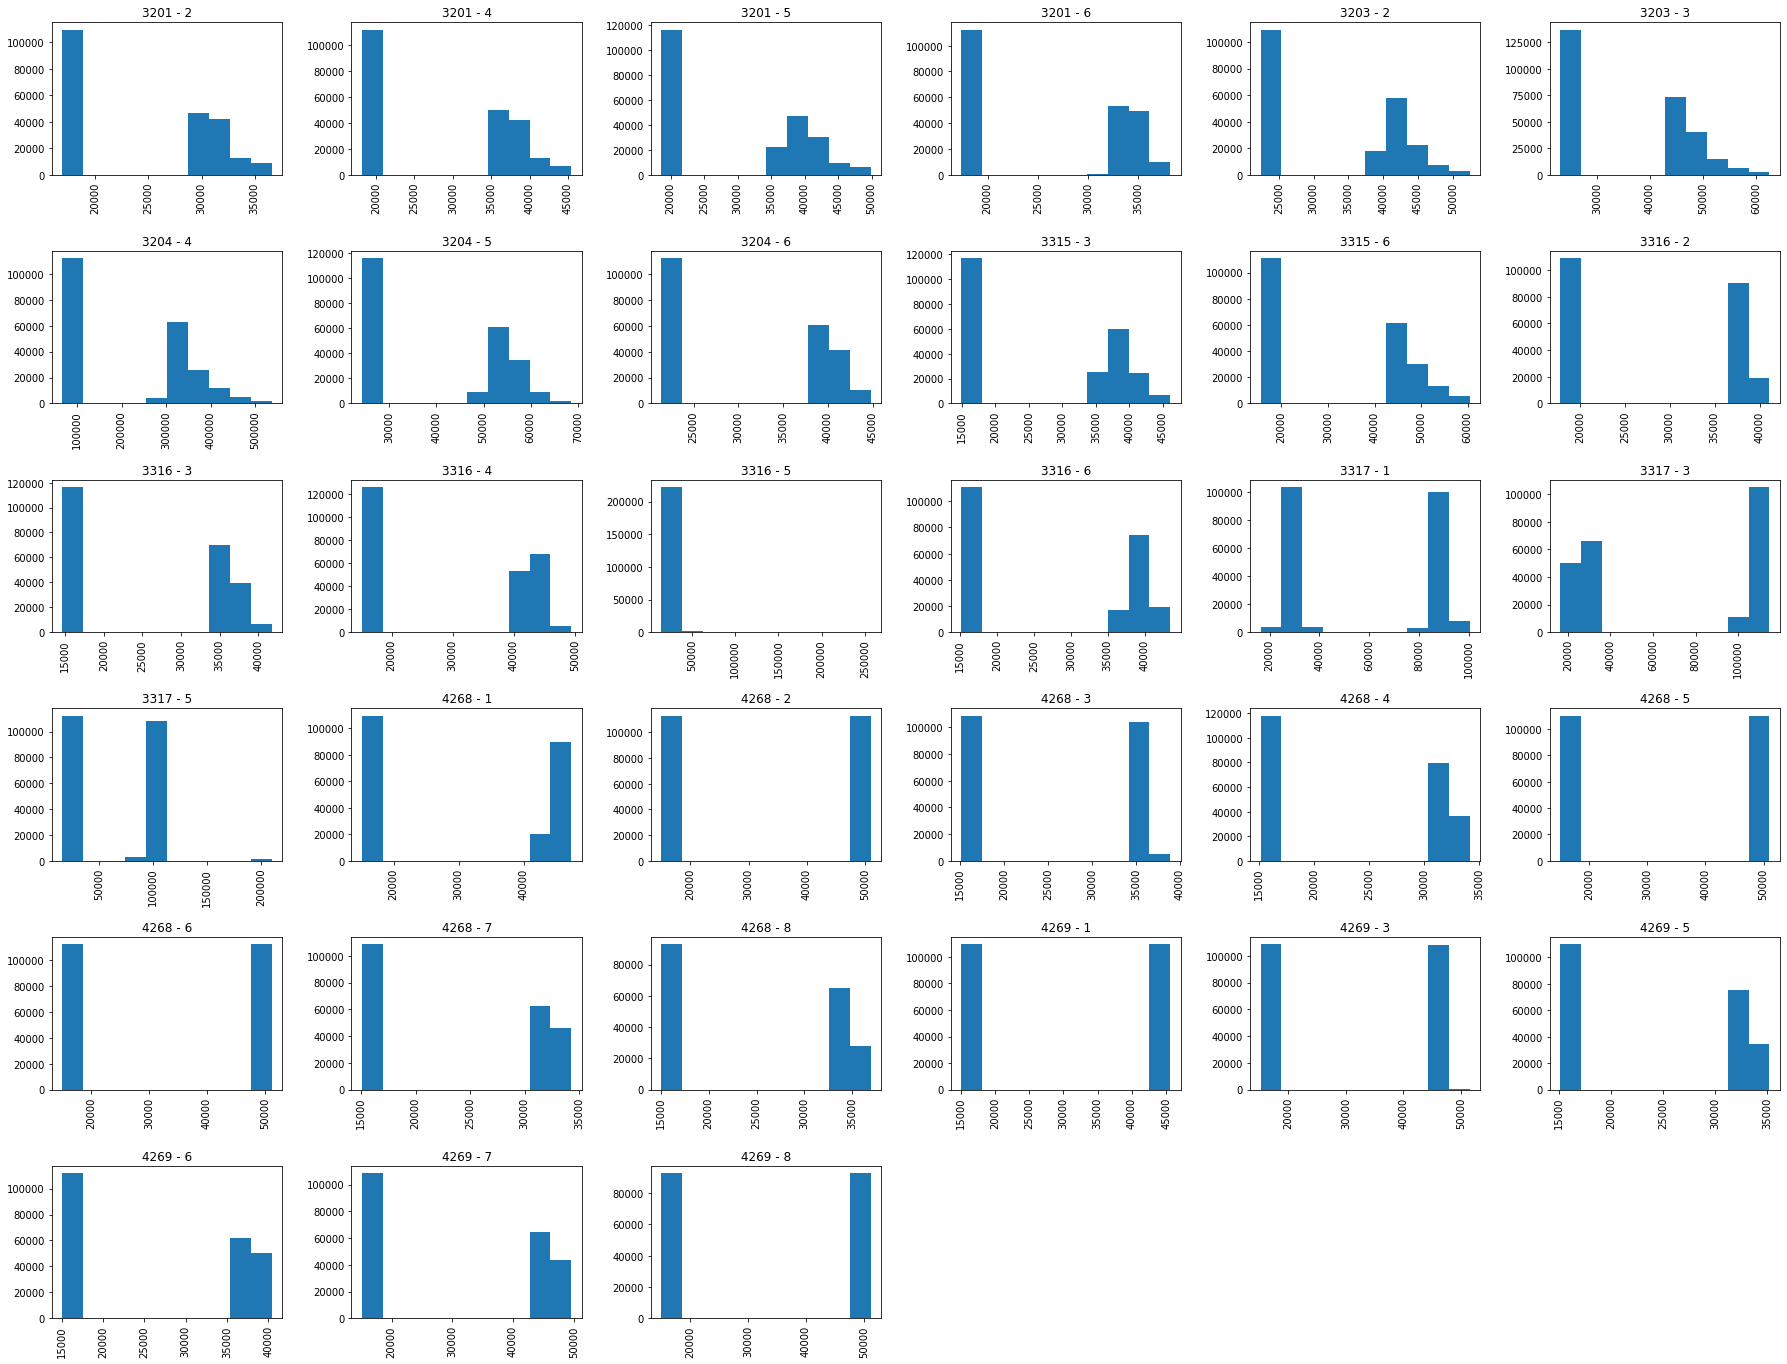

In [217]:
aux = photometry_data.copy()
aux['group'] = aux['subject'] + ' - ' + aux['day']
aux['gcamp'].hist(by=aux['group'],figsize = (30,24));

In [199]:
photometry_data[((photometry_data['subject'] != '3204') | (photometry_data['day'] != '4')) & ((photometry_data['subject'] != '3316') | (photometry_data['day'] != '5')) & ((photometry_data['subject'] != '3317') | (photometry_data['day'] != '5'))].describe()

,timestamp,gcamp,threshold
count,6708972.0000,6708972.0000,6708972.0000
mean,50379317.2896,31600.1932,1600.0000
std,6741026.2691,17705.9917,0.0000
min,32523149.9648,14653.0000,1600.0000
25%,47253129.6160,15783.0000,1600.0000
50%,51316146.0416,30108.0000,1600.0000
75%,55050427.5360,41951.0000,1600.0000
max,63125123.5584,114644.0000,1600.0000


In [186]:
photometry_data[((photometry_data['subject'] != '3204') | (photometry_data['day'] != '4'))].describe()

,timestamp,gcamp,threshold
count,7158465.0000,7158465.0000,7158465.0000
mean,50782274.9428,32484.1530,1600.0000
std,6721391.9163,19544.2317,0.0000
min,32523149.9648,14653.0000,1600.0000
25%,47526851.4048,15783.0000,1600.0000
50%,51722004.4160,30223.0000,1600.0000
75%,55575620.3776,41962.0000,1600.0000
max,63125123.5584,256893.0000,1600.0000


In [75]:
behavioral_data.head()

,timestamp,lp,he,rew,subject,threshold,day
1,48156682.8544,0.0000,0.0000,0.0000,4268,1600,7
2,48156686.8480,0.0000,0.0000,0.0000,4268,1600,7
3,48156690.9696,0.0000,0.0000,0.0000,4268,1600,7
4,48156690.9696,0.0000,0.0000,0.0000,4268,1600,7
5,48156695.0912,0.0000,0.0000,0.0000,4268,1600,7


In [76]:
len(behavioral_data)

51414779

In [84]:
behavioral_data = behavioral_data.drop_duplicates()
len(behavioral_data)

48529893

In [85]:
behavioral_data.to_csv("../processed/analog_data.csv", index=False)

In [77]:
photometry_data.head()

,timestamp,gcamp,subject,threshold,day
0,48157341.5552,0.0000,4268,1600,7
1,48157392.5504,0.0540,4268,1600,7
2,48157441.3824,0.0739,4268,1600,7
3,48157491.5200,0.2379,4268,1600,7
4,48157542.1568,0.2559,4268,1600,7


In [78]:
len(photometry_data)

3691184

In [86]:
photometry_data = photometry_data.drop_duplicates()
len(photometry_data)

3691184

In [87]:
photometry_data.to_csv("../processed/photometry_data.csv", index=False)